####K-Means Clustering

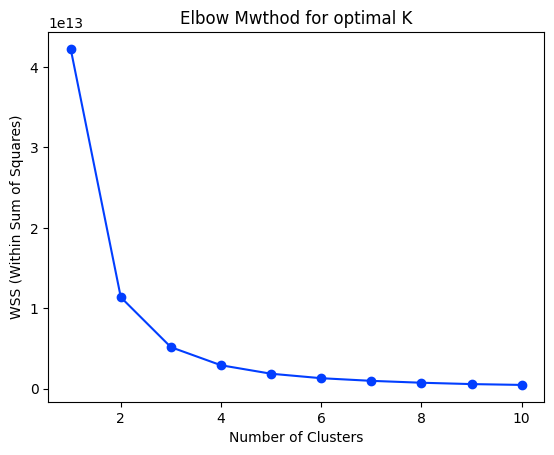

In [ ]:
from sklearn.cluster import KMeans

wss= []

for i in range(1,11):
  cls =  KMeans(n_clusters=i,random_state=42)
  cls.fit(df_pca)
  wss.append(cls.inertia_)

plt.plot(range(1,11),wss,marker='o')
plt.title('Elbow Method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS (Within Sum of Squares)')
plt.show()

In [ ]:
#Fit the model with 3 clusters
model = KMeans(n_clusters=3,random_state=42)
model.fit_predict(df11)
clusters = model.labels_

In [ ]:
#Show the cluster labels for principal components
df_pca['Cluster'] = clusters
df_pca.head()

,PC1,PC2,Cluster
0,859.124827,80.166534,2
1,-16041.724923,206.055314,1
2,-2107.935198,457.495950,2
3,-12736.275978,-74.512102,1
4,31413.932882,-153.941951,0


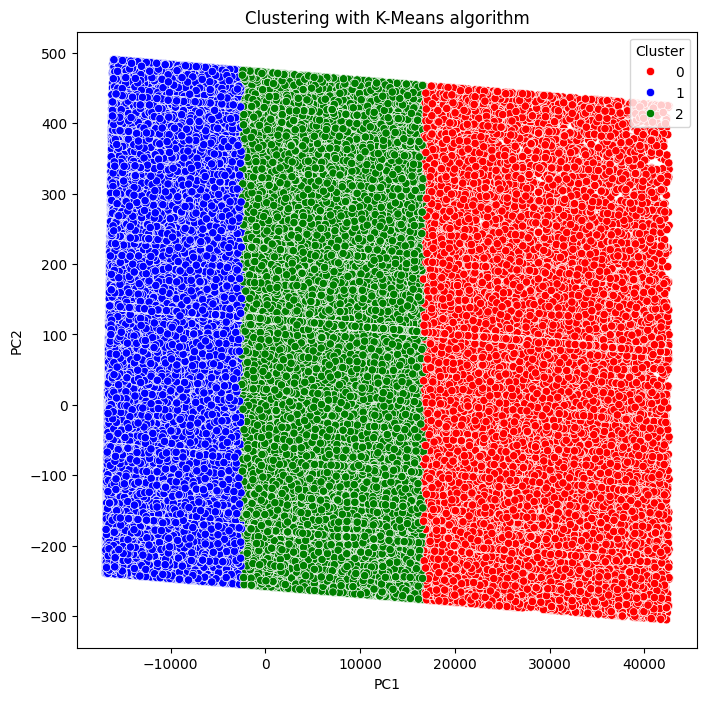

In [ ]:
#Plot clustering with k-means algorithm
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='Cluster',palette=['red','blue','green','black'])
plt.title("Clustering with K-Means algorithm")
plt.show()

In [ ]:
#Assign clusters to every element in the scaled dataset
df11['Cluster'] = clusters
df11.sample(5)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR,Cluster
243172,0,13279.12,589.78,36,0.044414,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
952189,0,11481.51,200.00,34,0.017419,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495875,1,24894.92,399.00,43,0.016027,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1014910,0,1304.29,295.00,35,0.226177,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
868878,1,7969.62,738.95,35,0.092721,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df10.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'BalTransRatio', 'TransactionMonth'],
      dtype='object')

In [ ]:
df11['CustLocation'] = df10['CustLocation']

In [ ]:
#Combine the two datasets
df12 = pd.concat([df10,df11['Cluster']],axis=1)
df12.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,Cluster
2,0,MUMBAI,17874.44,459.00,29,0.025679,2,2
6,0,MUMBAI,973.46,566.00,33,0.581431,2,1
8,0,GURGAON,14906.96,833.00,37,0.055880,2,2
9,1,MUMBAI,4279.22,289.11,41,0.067561,2,1
10,1,MOHALI,48429.49,259.00,43,0.005348,2,0


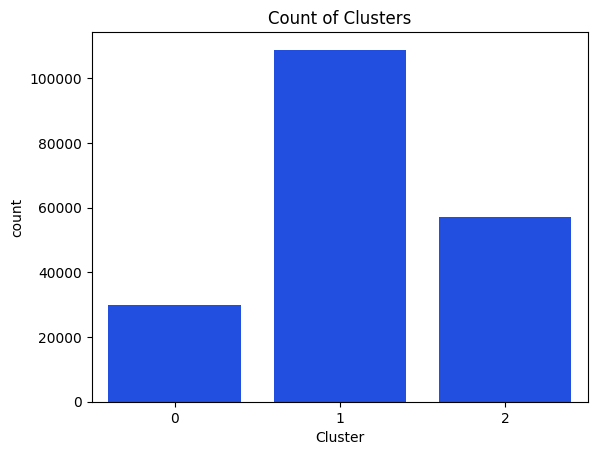

In [ ]:
#Show the count of each clusters
sns.countplot(data=df12,x='Cluster')
plt.title('Count of Clusters')
plt.show()

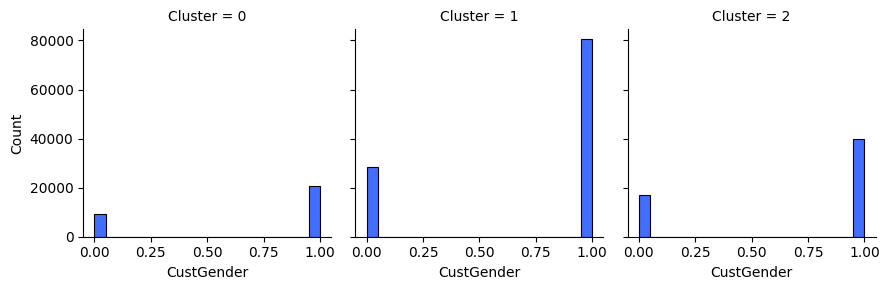

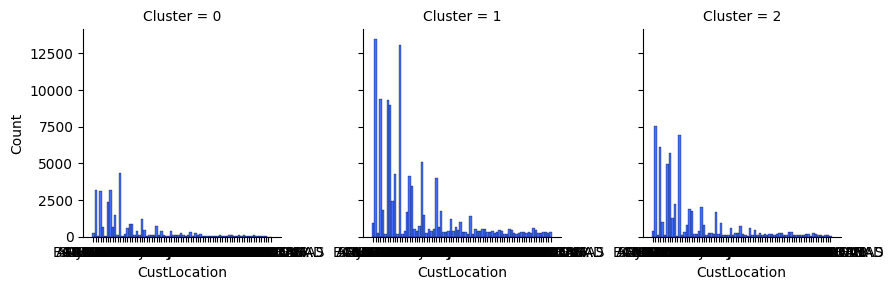

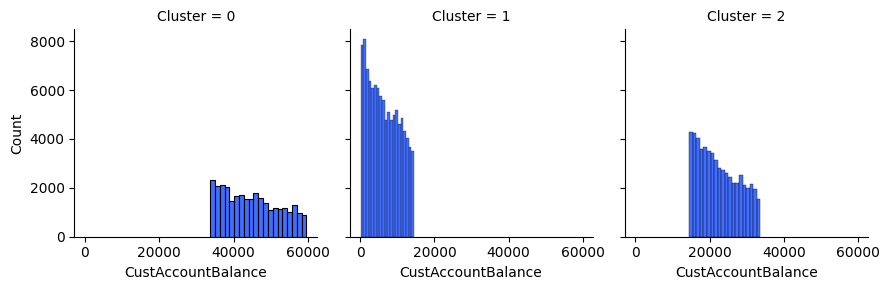

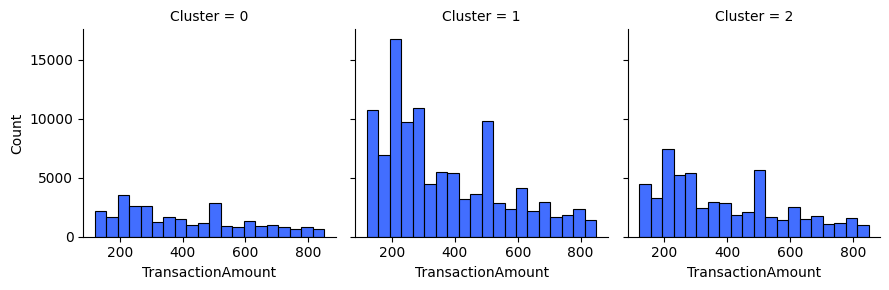

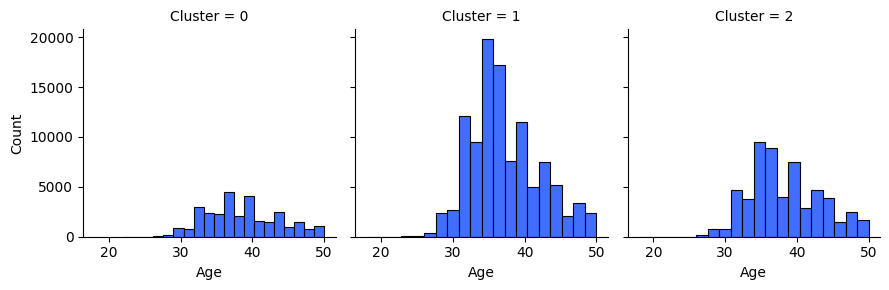

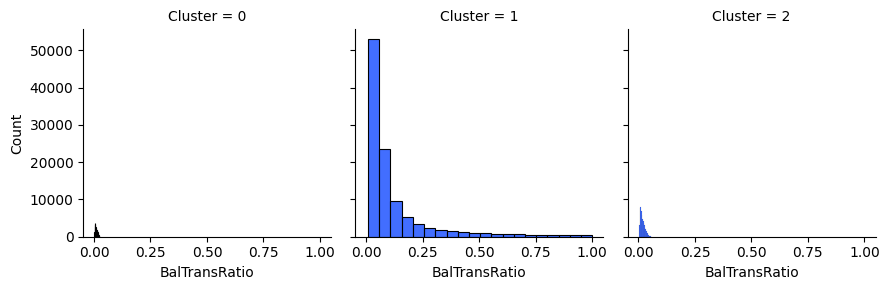

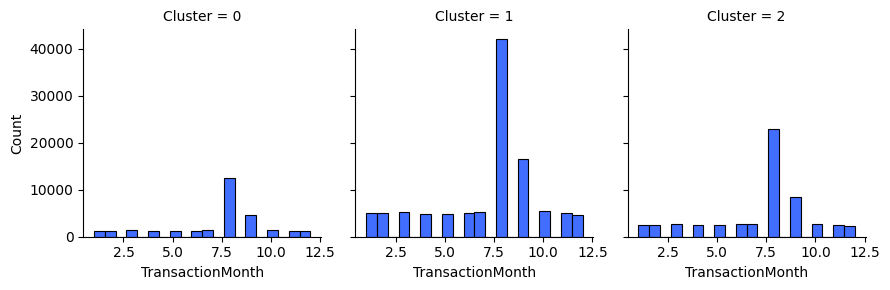

In [ ]:
#Distribution of features with clusters
cols = df12.drop(['Cluster'],axis=1).columns

for c in cols:
  grid = sns.FacetGrid(df12,col='Cluster')
  grid.map(sns.histplot,c,bins=20)
  plt.xlabel(c)
  plt.show()

In [ ]:
#export the model into pickle file
import joblib
joblib.dump(model,'model.pkl')

#Export the dataset into csv file
df12.to_csv('/content/drive/MyDrive/Case Studies/HSBC/datasets/clustered_data.csv')